In [1]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [2]:
L = 5
B = 1
num = np.arange(L**2).reshape((L,L))

def neighbor(value):
    left = (value - 1) % L + (value // L) * L
    right = (value + 1) % L + (value // L) * L
    up = (value - L) % (L * L)
    down = (value + L) % (L * L)

    return [left, right, up, down]


def energy(S) :
    E = 0
    for i in range(L**2) :
      temp=neighbor(i)
      n = S[np.where(num==i)]
      l = S[np.where(num==temp[0])]
      r = S[np.where(num==temp[1])]
      u = S[np.where(num==temp[2])]
      d = S[np.where(num==temp[3])]
      value = n*(l+r+u+d)
      E += value
    return float(-E/2)

def new_energy(new) :
    temp=neighbor(num[i,j])
    n = new[i,j]
    l = new[np.where(num==temp[0])]
    r = new[np.where(num==temp[1])]
    u = new[np.where(num==temp[2])]
    d = new[np.where(num==temp[3])]
    change = 2*n*(l+r+u+d)
    return float(change)

def alp(old,new):
  ex4 = np.exp(-B*4)
  ex8 = np.exp(-B*8)
  ex_dict = {4 : ex4, 8 : ex8}
  if old < new :
    result = ex_dict[new-old]
  else :
    result = 1
  return result

<ipython-input-2-c063fe186c77>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(-E/2)
<ipython-input-2-c063fe186c77>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(change)


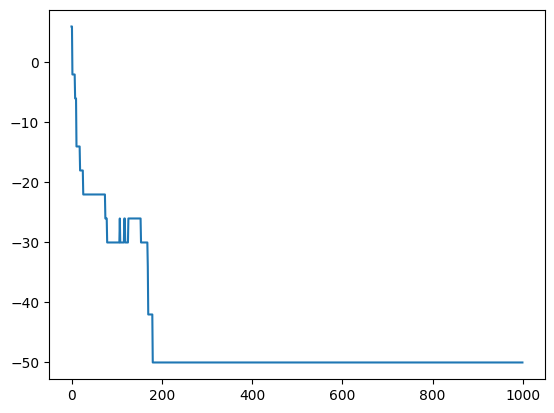

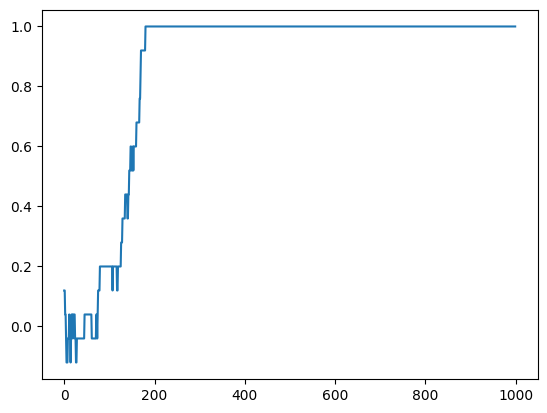

In [3]:
S = np.random.choice([-1, 1], size=(L, L))
E_list = []
m_list = []
old = energy(S)

for _ in range(1000) :
    random_index = np.random.randint(0, L, size=2)
    i, j = random_index
    new_S = np.copy(S)
    new_S[i, j] *= -1
    new = old - new_energy(new_S)
    p = alp(old,new)
    value = np.random.choice([old, new], p=[1-p, p])
    if value == new :
      S = new_S
      old = new

    E_list.append(old)
    m_list.append(np.sum(S)/L**2)

plt.plot(E_list)
plt.show()
plt.plot(m_list)
plt.show()

<ipython-input-2-c063fe186c77>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(-E/2)
<ipython-input-2-c063fe186c77>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(change)


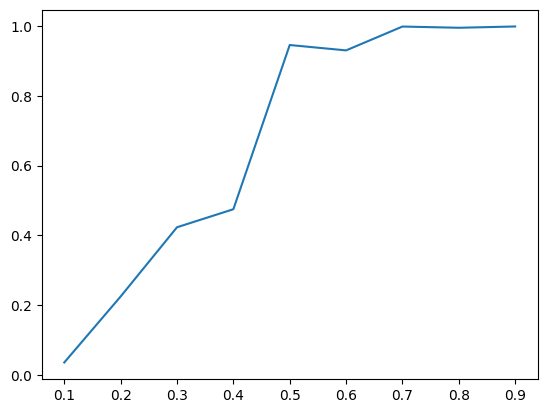

In [4]:
Emean = []
Smean = []

for b in np.arange(0.1,1.0,0.1) :
  B = float(b)
  S = np.random.choice([-1, 1], size=(L, L))
  E_list = []
  m_list = []
  old = energy(S)

  for _ in range(1000) :
    random_index = np.random.randint(0, L, size=2)
    i, j = random_index
    new_S = np.copy(S)
    new_S[i, j] *= -1
    new = old - new_energy(new_S)
    p = alp(old,new)
    value = np.random.choice([old, new], p=[1-p, p])
    if value == new :
      S = new_S
      old = new

    E_list.append(old)
    m_list.append(np.sum(S)/L**2)

  Emean.append(sum(E_list[200:])/len(E_list[200:]))
  Smean.append(abs(sum(m_list[200:])/len(m_list[200:])))

plt.plot(np.arange(0.1,1.0,0.1),Smean)
plt.show()